Fetch the data


In [135]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

with open('bond_receiver.json') as file:
    bond_receiver_data = json.load(file)  # Load a sample of 5 records

with open('buyer_details.json') as file:
    buyer_details_data = json.load(file) # Load a sample of 5 records

bond_receiver_data, buyer_details_data

# Calculate total denomination per political party
total_denomination_per_party = defaultdict(int)
for detail in bond_receiver_data:
    if detail['Denomination'] is not None:  # Exclude entries with no denomination information
        total_denomination_per_party[detail['Name of the Political Party']] += detail['Denomination']

Basic Analysis

{'total_bonds_sold': 18871, 'total_amount_sold': 121555132000, 'unique_buyers': 1316, 'date_of_first_purchase': Timestamp('2019-04-12 00:00:00'), 'date_of_last_purchase': Timestamp('2024-01-11 00:00:00')}


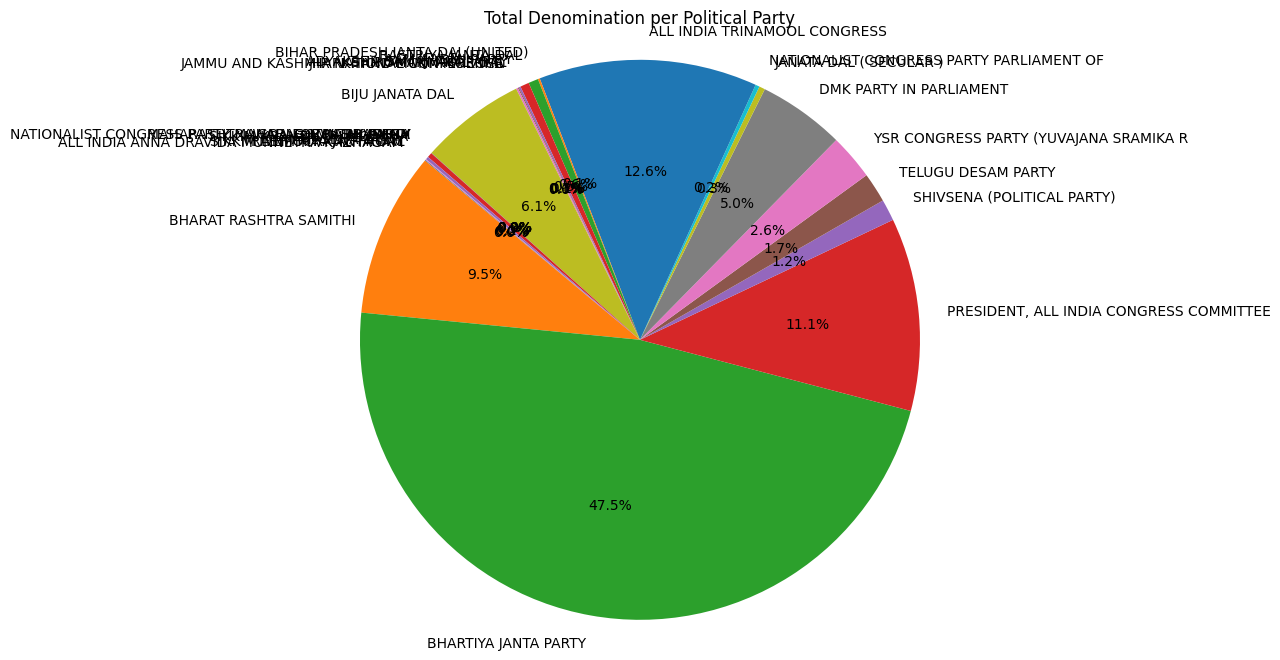

In [136]:
# Load your data
df_transactions = pd.DataFrame(bond_receiver_data)
df_transactions['Date of Encashment'] = pd.to_datetime(df_transactions['Date of Encashment'], format='%d/%b/%Y')
df_buyer_transactions = pd.DataFrame(buyer_details_data)
df_buyer_transactions['Date of Purchase'] = pd.to_datetime(df_buyer_transactions['Date of Purchase'], format='%d/%b/%Y')

# Initial analysis setup
analysis = {
    "total_bonds_sold": len(buyer_details_data),
    "total_amount_sold": sum(item['Denomination'] for item in buyer_details_data),
    "unique_buyers": len(set(item['Purchaser Name'] for item in buyer_details_data)),
    "date_of_first_purchase": df_buyer_transactions['Date of Purchase'].min(),
    "date_of_last_purchase": df_buyer_transactions['Date of Purchase'].max(),
}
print(analysis)

# Convert to lists for plotting
parties = list(total_denomination_per_party.keys())
total_denominations = list(total_denomination_per_party.values())
# Plot
plt.figure(figsize=(10, 8))
plt.pie(total_denominations, labels=parties, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Total Denomination per Political Party')
plt.show()

Bonds purchased

Plotting for Top 3 Parties encashing the bonds

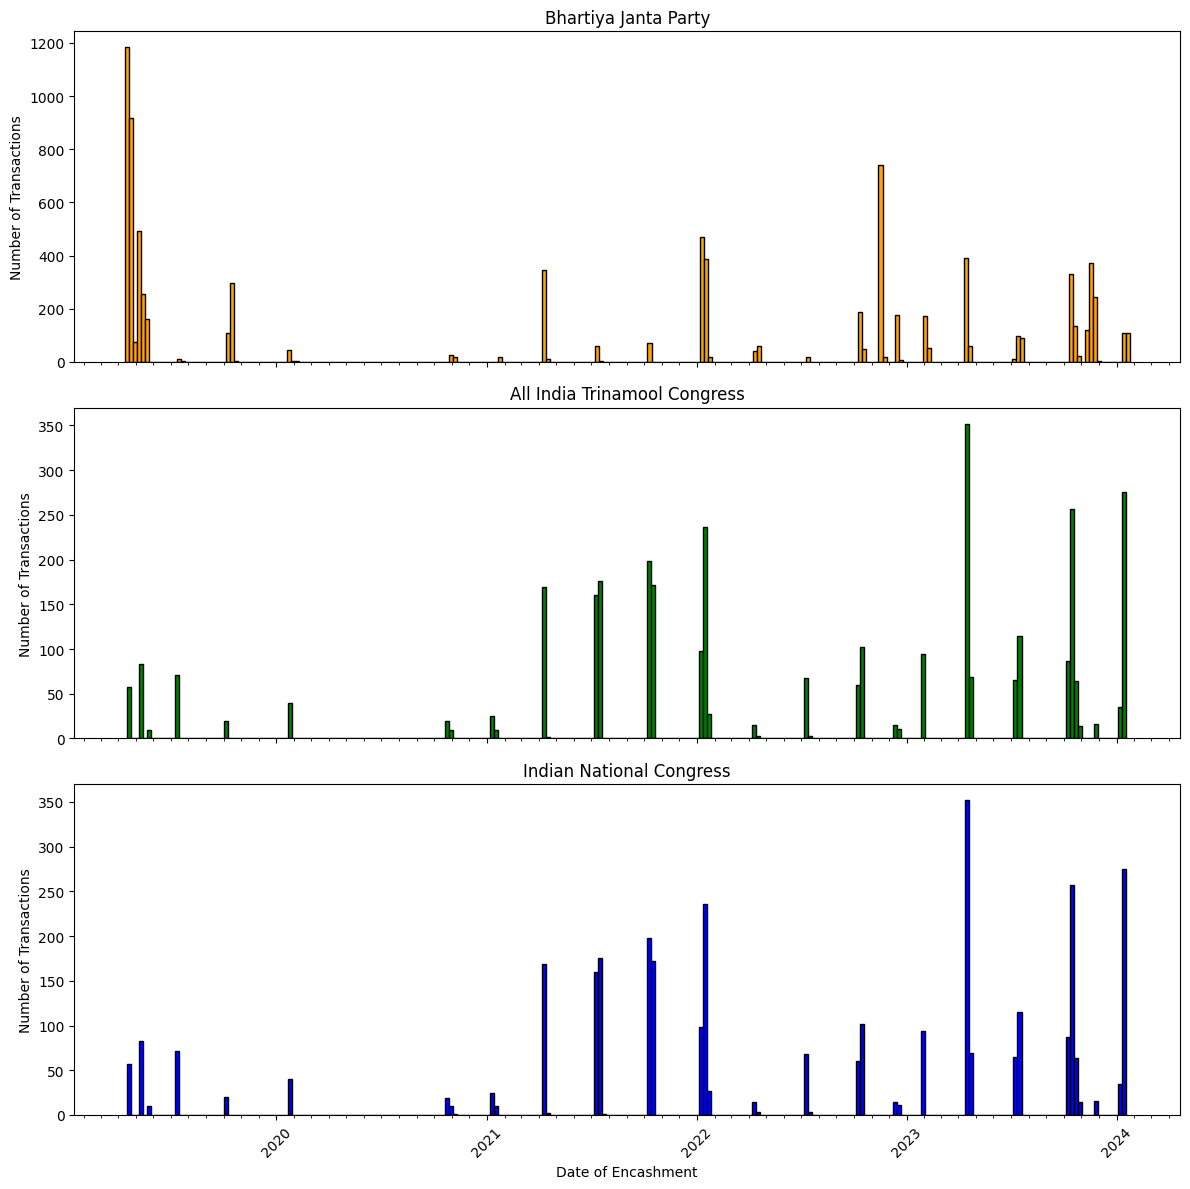

In [144]:
# Filter for Bhartiya Janta Party and convert dates
bjp_data = [item for item in bond_receiver_data if item['Name of the Political Party'] == 'BHARTIYA JANTA PARTY']
bjp_encashment_dates = [datetime.strptime(item['Date of Encashment'], '%d/%b/%Y') for item in bjp_data]

# ALL INDIA TRINAMOOL CONGRESS
tmc_data = [item for item in bond_receiver_data if item['Name of the Political Party'] == 'ALL INDIA TRINAMOOL CONGRESS']
tmc_encashment_dates = [datetime.strptime(item['Date of Encashment'], '%d/%b/%Y') for item in tmc_data]

# PRESIDENT, ALL INDIA CONGRESS COMMITTEE
inc_data = [item for item in bond_receiver_data if item['Name of the Political Party'] == 'ALL INDIA TRINAMOOL CONGRESS']
inc_encashment_dates = [datetime.strptime(item['Date of Encashment'], '%d/%b/%Y') for item in inc_data]

fig, axs = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# BJP
axs[0].hist(bjp_encashment_dates, bins=248, color='orange', edgecolor='black')
axs[0].set_title('Bhartiya Janta Party')
axs[0].set_ylabel('Number of Transactions')

# TMC
axs[1].hist(tmc_encashment_dates, bins=248, color='green', edgecolor='black')
axs[1].set_title('All India Trinamool Congress')
axs[1].set_ylabel('Number of Transactions')

# INC
axs[2].hist(inc_encashment_dates, bins=248, color='blue', edgecolor='black')
axs[2].set_title('Indian National Congress')
axs[2].set_ylabel('Number of Transactions')
axs[2].set_xlabel('Date of Encashment')

# Improve x-axis date formatting
for ax in axs:
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

`*Bonds Purchached per month Vs top 3 parties encashing bonds*`

C:\Users\meraj\AppData\Local\Temp\ipykernel_12032\1759797550.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_parties_transactions['Month'] = df_top_parties_transactions['Date of Encashment'].dt.to_period('M')


Transactions for April 2019
Top Parties: 
Name of the Political Party
ALL INDIA TRINAMOOL CONGRESS                 57
BHARTIYA JANTA PARTY                       2169
PRESIDENT, ALL INDIA CONGRESS COMMITTEE     409
Name: 2019-04, dtype: int64
Buyers: 
1335


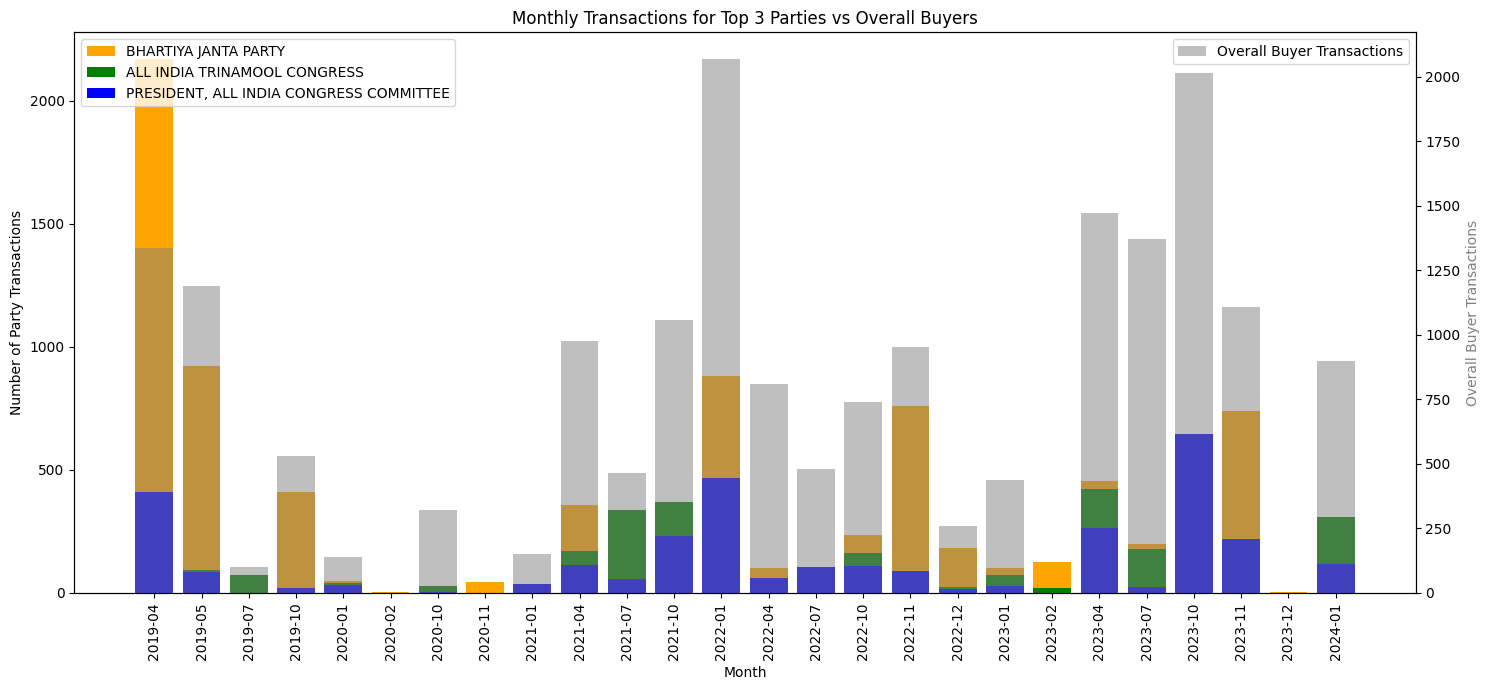

In [149]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load your data
df_transactions = pd.DataFrame(bond_receiver_data)
df_transactions['Date of Encashment'] = pd.to_datetime(df_transactions['Date of Encashment'], format='%d/%b/%Y')
df_buyer_transactions = pd.DataFrame(buyer_details_data)
df_buyer_transactions['Date of Purchase'] = pd.to_datetime(df_buyer_transactions['Date of Purchase'], format='%d/%b/%Y')

# Identify the top 3 parties based on the total number of transactions
top_parties = df_transactions['Name of the Political Party'].value_counts().nlargest(3).index.tolist()

# Filter transactions for only the top 3 parties
df_top_parties_transactions = df_transactions[df_transactions['Name of the Political Party'].isin(top_parties)]

# Assign each transaction to a monthly batch
df_top_parties_transactions['Month'] = df_top_parties_transactions['Date of Encashment'].dt.to_period('M')
df_buyer_transactions['Month'] = df_buyer_transactions['Date of Purchase'].dt.to_period('M')

# Aggregate transactions by party and month
party_monthly_counts = df_top_parties_transactions.groupby(['Name of the Political Party', 'Month']).size().unstack(fill_value=0)
buyer_monthly_counts = df_buyer_transactions.groupby('Month').size()
print("Transactions for April 2019")
print("Top Parties: ")
print(party_monthly_counts.loc[:, '2019-04'])
print("Buyers: ")
print(buyer_monthly_counts['2019-04'])
# Plotting
fig, ax1 = plt.subplots(figsize=(15, 7))

# Define colors for each party
party_colors = {
    'BHARTIYA JANTA PARTY': 'orange',
    'ALL INDIA TRINAMOOL CONGRESS': 'green',
    'PRESIDENT, ALL INDIA CONGRESS COMMITTEE': 'blue'
}

# Plot each party's transactions per month on the primary y-axis
for party in top_parties:
    party_counts = party_monthly_counts.loc[party]
    ax1.bar(party_counts.index.astype(str), party_counts, label=party, color=party_colors[party])

# Plot the overall buyer transactions on the secondary y-axis
ax2 = ax1.twinx()
ax2.bar(buyer_monthly_counts.index.astype(str), buyer_monthly_counts, label='Overall Buyer Transactions', color='gray', alpha=0.5)

# Set labels and title
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Party Transactions')
ax2.set_ylabel('Overall Buyer Transactions', color='gray')
ax1.set_title('Monthly Transactions for Top 3 Parties vs Overall Buyers')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Improve the layout of the x-axis labels
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)

plt.tight_layout()
plt.show()


As seen above the total number of bonds purchased in the data set for the month of April/2019 is lesser commpared to the bonds encashed by parties